Fuente:
Regresión logística simple y múltiple by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/27_regresion_logistica_simple_y_multiple.html

# Regresión logística simple




## Introducción


La Regresión Logística Simple, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. Por ejemplo, clasificar a un individuo desconocido como hombre o mujer en función del tamaño de la mandíbula.

    Es importante tener en cuenta que, aunque la regresión logística permite clasificar, se trata de un modelo de regresión que modela el logaritmo de la probabilidad de pertenecer a cada grupo. La asignación final se hace en función de las probabilidades predichas.

    La existencia de una relación significativa entre una variable cualitativa con dos niveles y una variable continua se puede estudiar mediante otros test estadísticos tales como t-test o ANOVA (un ANOVA de dos grupos es equivalente al t-test). Sin embargo, la regresión logística permite además calcular la probabilidad de que la variable dependiente pertenezca a cada una de las dos categorías en función del valor que adquiera la variable independiente. Supóngase que se quiere estudiar la relación entre los niveles de colesterol y los ataques de corazón. Para ello, se mide el colesterol de un grupo de personas y durante los siguientes 20 años se monitoriza que individuos han sufrido un ataque. Un t-test entre los niveles de colesterol de las personas que han sufrido ataque vs las que no lo han sufrido permitiría contrastar la hipótesis de que el colesterol y los ataques al corazón están asociados. Si además se desea conocer la probabilidad de que una persona con un determinado nivel de colesterol sufra un infarto en los próximos 20 años, o poder conocer cuánto tiene que reducir el colesterol un paciente para no superar un 50% de probabilidad de padecer un infarto en los próximos 20 años, se tiene que recurrir a la regresión logística.


## ¿Por qué regresión logística y no lineal?


Si una variable cualitativa con dos niveles se codifica como 1 y 0, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados $β_0+β_1x$

El problema de esta aproximación es que, al tratarse de una recta, para valores extremos del predictor, se obtienen valores de Y menores que 0 o mayores que 1, lo que entra en contradicción con el hecho de que las probabilidades siempre están dentro del rango [0,1].

En el siguiente ejemplo se modela la probabilidad de fraude por impago (default) en función del balance de la cuenta bancaria (balance).

## Posibilidades para disponer de R en Jupyter

https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/

https://anderfernandez.com/blog/programar-con-python-y-r-en-el-mismo-jupyter-notebook/

#!pip install rpy2

In [1]:
%load_ext rpy2.ipython

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [ ]:
%%R
install.packages("ISLR") 

In [2]:
%%R
library(tidyverse)
library(ISLR)
datos <- Default

# Se recodifican los niveles No, Yes a 1 y 0
datos <- datos %>%
         select(default, balance) %>%
         mutate(default = recode(default,
                                 "No"  = 0,
                                 "Yes" = 1))
head(datos)

R[write to console]: -- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

R[write to console]: -- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



  default   balance
1       0  729.5265
2       0  817.1804
3       0 1073.5492
4       0  529.2506
5       0  785.6559
6       0  919.5885


R[write to console]: `geom_smooth()` using formula 'y ~ x'



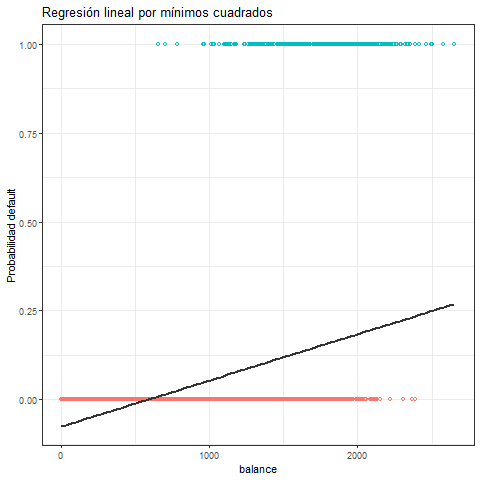

In [3]:
%%R
# Ajuste de un modelo lineal por mínimos cuadrados.
modelo_lineal <- lm(default ~ balance, data = datos)

# Representación gráfica del modelo.
ggplot(data = datos, aes(x = balance, y = default)) +
  geom_point(aes(color = as.factor(default)), shape = 1) + 
  geom_smooth(method = "lm", color = "gray20", se = FALSE) +
  theme_bw()  +
  labs(title = "Regresión lineal por mínimos cuadrados", y = "Probabilidad default") +
  theme(legend.position = "none")

Al tratarse de una recta, si por ejemplo, se predice la probabilidad de default para alguien que tiene un balance de 10000, el valor obtenido es mayor que 1.


In [4]:
%%R
predict(object = modelo_lineal, newdata = data.frame(balance = 10000))

      1 
1.22353 


Para evitar estos problemas, la regresión logística transforma el valor devuelto por la regresión lineal $β_0+β_1X$

empleando una función cuyo resultado está siempre comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$\text{función sigmoide}=σ(x)=\frac{1}{1+e^{−x}} (1)$$

Para valores de $x$ muy grandes positivos, el valor de $e^{−x}$ es aproximadamente $0$ por lo que el valor de la función sigmoide es $1$. Para valores de $x$ muy grandes negativos, el valor $e^{−x}$ tiende a infinito por lo que el valor de la función sigmoide es $0$.

Sustituyendo la $x$ de la ecuación 1 por la función lineal $$β_0+β_1X$$ se obtiene que:

$$P(Y=k|X=x)=\frac{1}{1+e^{−(β_0+β_1X)}}$$

$$\frac{1}{\frac{e^{β_0}+β_1X}{e^{β_0}+β_1X}+\frac{1}{e^{β_0}+β_1X}}=$$


$$\frac{1}{\frac{1+e^{β_0}+β_1X}{e^{β_0}+β_1X}}= \frac{e^{β_0}+β_1X}{1+e^{β_0}+β_1X}$$


donde $Pr(Y=k|X=x)$ puede interpretarse como: la probabilidad de que la variable cualitativa $Y$ adquiera el valor $k$ (el nivel de referencia, codificado como 1), dado que el predictor $X$ tiene el valor $x$.

Esta función, puede ajustarse de forma sencilla con métodos de regresión lineal si se emplea su versión logarítmica, obteniendo lo que se conoce como LOG of ODDs

$$ln(\frac{p(Y=k|X=x)}{1−p(Y=k|X=x)})=β_0+β_1X$$

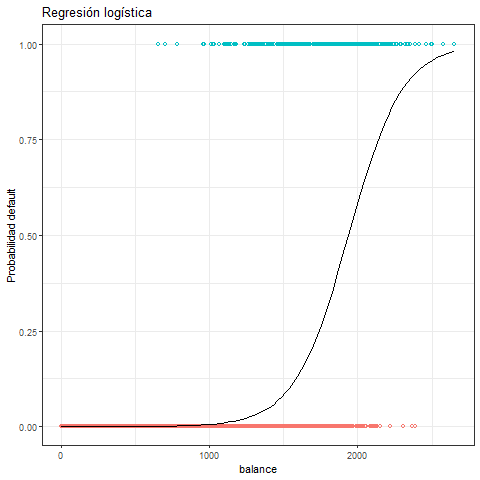

In [5]:
%%R
# Ajuste de un modelo logístico.
modelo_logistico <- glm(default ~ balance, data = datos, family = "binomial")

# Representación gráfica del modelo.
ggplot(data = datos, aes(x = balance, y = default)) +
  geom_point(aes(color = as.factor(default)), shape = 1) + 
  stat_function(fun = function(x){predict(modelo_logistico,
                                          newdata = data.frame(balance = x),
                                          type = "response")}) +
  theme_bw() +
  labs(title = "Regresión logística",
       y = "Probabilidad default") +
  theme(legend.position = "none")

R[write to console]: `geom_smooth()` using formula 'y ~ x'



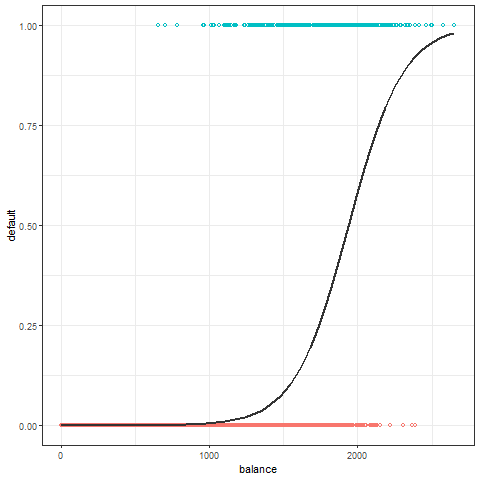

In [6]:
%%R
# Con geom_smooth se puede obtener el gráfico directamente.
ggplot(data = datos, aes(x = balance, y = default)) +
  geom_point(aes(color = as.factor(default)), shape = 1) + 
  geom_smooth(method = "glm",
              method.args = list(family = "binomial"),
              color = "gray20",
              se = FALSE) +
  theme_bw() +
  theme(legend.position = "none")


## Concepto de ODDS o razón de probabilidad, ratio de ODDS y logaritmo de ODDS


En la regresión lineal simple, se modela el valor de la variable dependiente Y en función del valor de la variable independiente X. Sin embargo, en la regresión logística, tal como se ha descrito en la sección anterior, se modela la probabilidad de que la variable respuesta Y pertenezca al nivel de referencia 1 en función del valor que adquieran los predictores, mediante el uso de LOG of ODDs.

Supóngase que la probabilidad de que un evento sea verdadero es de 0.8, por lo que la probabilidad de evento falso es de $1 - 0.8 = 0.2$. Los ODDs o razón de probabilidad de verdadero se definen como el ratio entre la probabilidad de evento verdadero y la probabilidad de evento falso pq

. En este caso los ODDs de verdadero son $0.8 / 0.2 = 4$, lo que equivale a decir que se esperan 4 eventos verdaderos por cada evento falso.

Función monótona: https://es.wikipedia.org/wiki/Funci%C3%B3n_mon%C3%B3tona

La trasformación de probabilidades a ODDs es monotónica, si la probabilidad aumenta también lo hacen los ODDs, y viceversa. El rango de valores que pueden tomar los ODDs es de [0,∞]. 

Dado que el valor de una probabilidad está acotado entre [0,1] se recurre a una trasformación logit (existen otras) que consiste en el logaritmo natural de los ODDs. Esto permite convertir el rango de probabilidad previamente limitado a [0,1] a [−∞,+∞].



<table class="table table-condensed" style="width:60%">
<thead>
<tr class="header">
<th>p</th>
<th>odds</th>
<th>Log(odds)</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>0.001</td>
<td>0.001001</td>
<td>-6.906755</td>
</tr>
<tr class="even">
<td>0.01</td>
<td>0.010101</td>
<td>-4.59512</td>
</tr>
<tr class="odd">
<td>0.2</td>
<td>0.25</td>
<td>-1.386294</td>
</tr>
<tr class="even">
<td>0.3</td>
<td>0.4285714</td>
<td>-0.8472978</td>
</tr>
<tr class="odd">
<td>0.4</td>
<td>0.6666667</td>
<td>-0.4054651</td>
</tr>
<tr class="even">
<td>0.5</td>
<td>1</td>
<td>0</td>
</tr>
<tr class="odd">
<td>0.6</td>
<td>1.5</td>
<td>0.4054651</td>
</tr>
<tr class="even">
<td>0.7</td>
<td>2.333333</td>
<td>0.8472978</td>
</tr>
<tr class="odd">
<td>0.8</td>
<td>4</td>
<td>1.386294</td>
</tr>
<tr class="even">
<td>0.9</td>
<td>9</td>
<td>2.197225</td>
</tr>
<tr class="odd">
<td>0.999</td>
<td>999</td>
<td>6.906755</td>
</tr>
<tr class="even">
<td>0.9999</td>
<td>9999</td>
<td>9.21024</td>
</tr>
</tbody>
</table>

## Ajuste del modelo


Una vez obtenida la relación lineal entre el logaritmo de los ODDs y la variable predictora X, se tienen que estimar los parámetros $β_0$ y $β_1$. La combinación óptima de valores será aquella que tenga la máxima verosimilitud (maximum likelihood ML), es decir el valor de los parámetros $β_0$ y $β_1$ con los que se maximiza la probabilidad de obtener los datos observados.

El método de maximum likelihood está ampliamente extendido en la estadística aunque su implementación no siempre es trivial. En el este enlace se puede obtener una descripción detallada de cómo encontrar los valores $β_0$ y $β_1$ de máxima verosimilitud empleando el método de Newton.

Otra forma para ajustar un modelo de regresión logística es empleando descenso de gradiente. Si bien este no es el método de optimización más adecuado para resolver la regresión logística, está muy extendido en el ámbito del machine learning para ajustar otros modelos. En los Anexos puede encontrarse una implementación completa.

## Evaluación del modelo


Existen diferentes técnicas estadísticas para calcular la significancia de un modelo logístico en su conjunto (p-value del modelo). Todos ellos consideran que el modelo es útil si es capaz de mostrar una mejora respecto a lo que se conoce como modelo nulo, el modelo sin predictores, solo con $β_0$

. Dos de los más empleados son:

    Wald chi-square: está muy expandido pero pierde precisión con tamaños muestrales pequeños.

    Likelihood ratio: usa la diferencia entre la probabilidad de obtener los valores observados con el modelo logístico creado y las probabilidades de hacerlo con un modelo sin relación entre las variables. Para ello, calcula la significancia de la diferencia de residuos entre el modelo con predictores y el modelo nulo (modelo sin predictores). El estadístico tiene una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos comparados. Si se compara respecto al modelo nulo, los grados de libertad equivalen al número de predictores del modelo generado. En el libro Handbook for biological statistics se recomienda usar este.

Para determinar la significancia individual de cada uno de los predictores introducidos en un modelo de regresión logística se emplea el estadístico Z y el test Wald chi-test. En R, este es el método utilizado para calcular los p-values que se muestran al hacer summary() del modelo.

## Interpretación del modelo


A diferencia de la regresión lineal, en la que β1 se corresponde con el cambio promedio en la variable dependiente Y debido al incremento en una unidad del predictor X, en regresión logística, β1 indica el cambio en el logaritmo de ODDs debido al incremento de una unidad de X, o lo que es lo mismo, multiplica los ODDs por eβ1. Dado que la relación entre p(Y) y X no es lineal, β1 no se corresponde con el cambio en la probabilidad de Y asociada con el incremento de una unidad de X. Cuánto se incremente la probabilidad de Y por unidad de X depende del valor de X, es decir, de la posición en la curva logística en la que se encuentre.

## Condiciones


    Independencia: las observaciones tienen que ser independientes unas de otras.

    Relación lineal entre el logaritmo natural de odds y la variable continua: patrones en forma de U son una clara violación de esta condición.

    La regresión logística no precisa de una distribución normal de la variable continua independiente.

    Número de observaciones: no existe una norma establecida al respecto, pero se recomienda entre 50 a 100 observaciones.


## Predicciones


Una vez estimados los coeficientes del modelo logístico, es posible conocer la probabilidad de que la variable dependiente pertenezca al nivel de referencia, dado un determinado valor del predictor. Para ello se emplea la ecuación del modelo:

$$\hat{p}(Y=1|X)=\frac{e^\hat{β_0}+\hat{β_1}X}{1+e^{\hat{β_0}}+\hat{β_1}X} (2)$$

Más adelante en este documento, se emplea la función glm() con family="binomial" para ajustar modelos de regresión logística. Esta función predice por defecto el log(ODDs) de la variable respuesta. Para obtener las probabilidades P(y=1)
hay que aplicar la ecuación (2), donde el valor $e^{\hat{β}_0}+\hat{β}_1X$ es el log(ODDs) devuelto por el modelo. Otra opción es indicar el argumento type="response" en la función predict().

## Convertir probabilidad en clasificación


Una de las principales aplicaciones de un modelo de regresión logística es clasificar la variable cualitativa en función de valor que tome el predictor. Para conseguir esta clasificación, es necesario establecer un threshold de probabilidad a partir de la cual se considera que la variable pertenece a uno de los niveles. Por ejemplo, se puede asignar una observación al grupo 1 si $\hat{p}(Y=1|X)>0.5$ y al grupo 0 si de lo contrario. 

## Ejemplo


Un estudio quiere establecer un modelo que permita calcular la probabilidad de obtener una matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene.


In [8]:
%%R
matricula <- as.factor(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                         0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                         1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                         1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                         0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                         0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                         0, 0, 0, 0, 1, 0, 0, 0, 1, 1))
matematicas <- c(41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                 51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                 63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                 63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                 50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                 57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                 72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                 57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                 56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                 58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                 53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                 63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                 53, 42, 60, 52, 38, 57, 58, 65)
datos <- data.frame(matricula, matematicas)
head(datos, 4)

  matricula matematicas
1         0          41
2         0          53
3         0          54
4         0          47


## Representación de las observaciones


Representar las observaciones es útil para intuir si la variable independiente escogida está relacionada con la variable respuesta y, por lo tanto, puede ser un buen predictor.

In [9]:
%%R
library(ggplot2)
table(datos$matricula)


  0   1 
151  49 


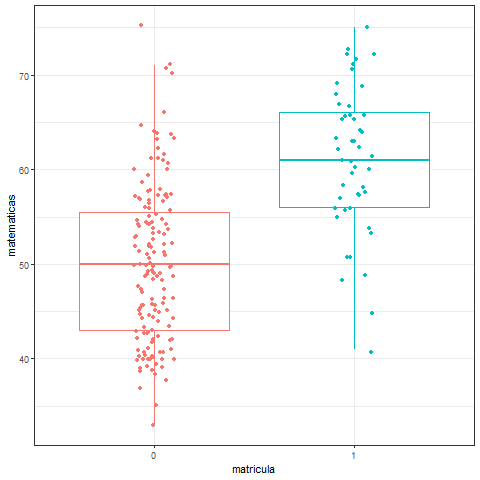

In [10]:
%%R
ggplot(data = datos, aes(x = matricula, y = matematicas, color = matricula)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.1) +
  theme_bw() +
  theme(legend.position = "null")

Parece existir una diferencia entre la nota de las personas con matrícula y sin matrícula.


## Generar el modelo de regresión logística




In [11]:
%%R
modelo <- glm(matricula ~ matematicas, data = datos, family = "binomial")
summary(modelo)


Call:
glm(formula = matricula ~ matematicas, family = "binomial", data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0332  -0.6785  -0.3506  -0.1565   2.6143  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.79394    1.48174  -6.610 3.85e-11 ***
matematicas  0.15634    0.02561   6.105 1.03e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 222.71  on 199  degrees of freedom
Residual deviance: 167.07  on 198  degrees of freedom
AIC: 171.07

Number of Fisher Scoring iterations: 5



El coeficiente estimado para la intersección es el valor esperado del logaritmo de odds de que un estudiante obtenga matrícula teniendo un 0 en en matemáticas. 

Como es de esperar, los odds son muy bajos $e^{−9.793942}=5.579e^{−5}$, lo que se corresponde con una probabilidad de obtener matrícula de $p=\frac{e^{−9.7939421}}{1+e^{−9.793942}}=5.579e^{−5}$.

Acorde al modelo, el logaritmo de los odds de que un estudiante tenga matrícula está positivamente relacionado con la puntuación obtenida en matemáticas (coeficiente de regresión = 0.1563404). Esto significa que, por cada unidad que se incrementa la variable matemáticas, se espera que el logaritmo de odds de la variable matrícula se incremente en promedio 0.1563404 unidades. Aplicando la inversa del logaritmo natural (e0.1563404=1.169)

se obtiene que, por cada unidad que se incrementa la variable matemáticas, los odds de obtener matrícula se incremente en promedio 1.169 unidades. No hay que confundir esto último con que la probabilidad de matrícula se incremente un 1.169 %.

A diferencia de la regresión lineal en la que β1
se corresponde con el cambio promedio en la variable dependiente Y debido al incremento en una unidad del predictor X, en regresión logística, β1 indica el cambio en el logaritmo de odds debido al incremento de una unidad de X, o lo que es lo mismo, multiplica los odds por eβ1. Dado que la relación entre p(Y) y X no es lineal, β1

no se corresponde con el cambio en la probabilidad de Y asociado con el incremento de una unidad de X. Cuánto se incremente la probabilidad de Y por unidad de X depende del valor de X, es decir, de la posición en la curva logística en la que se encuentre.

Además del valor de las estimaciones de los coeficientes parciales de correlación del modelo, es conveniente calcular sus correspondientes intervalos de confianza. En el caso de regresión logística, estos intervalos suelen calcularse empleando el método de profile likelihood (en R es el método por defecto si se tiene instalado el paquete MASS). Para una descripción más detallada ver: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf

In [12]:
%%R
confint(object = modelo, level = 0.95 )

R[write to console]: Waiting for profiling to be done...



                  2.5 %     97.5 %
(Intercept) -12.9375208 -7.0938806
matematicas   0.1093783  0.2103937


## Gráfico del modelo


Dado que un modelo logístico modela el logaritmo de ODDs, estas son las unidades en las que se devuelven las predicciones. Es necesario convertirlas de nuevo en probabilidad mediante la función logit. En R, la función predict() puede devolver directamente las probabilidades en lugar de los logODDs si se indica el argumento type="response". Sin embargo, si se quieren calcular intervalos de confianza y que estos no se salgan del rango [0, 1] es necesario emplear los logODDs y una vez que se les ha sustraído o sumado el margen de error (Z x SE) se transforman en probabilidades.

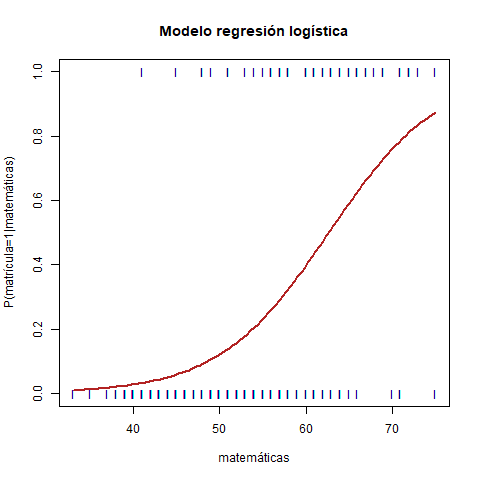

In [13]:
%%R
# MEDIANTE BASE GRAPHICS SIN INTERVALOS DE CONFIANZA

# Codificación 0,1 de la variable respuesta
datos$matricula <- as.character(datos$matricula)
datos$matricula <- as.numeric(datos$matricula)

plot(matricula ~ matematicas, datos, col = "darkblue",
     main = "Modelo regresión logística",
     ylab = "P(matrícula=1|matemáticas)",
     xlab = "matemáticas", pch = "I")

# type = "response" devuelve las predicciones en forma de probabilidad en lugar de en log_ODDs
curve(predict(modelo, data.frame(matematicas = x), type = "response"),
      col = "firebrick", lwd = 2.5, add = TRUE)

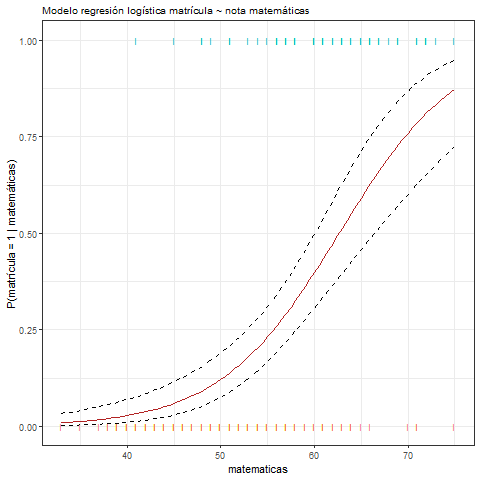

In [14]:
%%R
# MEDIANTE GGPLOT2 INCLUYENDO INTERVALOS DE CONFIANZA

datos$matricula <- as.character(datos$matricula)
datos$matricula <- as.numeric(datos$matricula)

# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
nuevos_puntos <- seq(from = min(datos$matematicas), to = max(datos$matematicas),
                     by = 0.5)


# Predicciones de los nuevos puntos según el modelo. 
# Si se indica se.fit = TRUE se devuelve el error estándar de cada predicción
# junto con el valor de la predicción (fit).
predicciones <- predict(modelo, data.frame(matematicas = nuevos_puntos),
                        se.fit = TRUE)

# Mediante la función logit se transforman los log_ODDs a probabilidades.
predicciones_logit <- exp(predicciones$fit) / (1 + exp(predicciones$fit))

# Se calcula el límite inferior y superior del IC del 95% sustrayendo e
# incrementando el logODDs de cada predicción 1.95*SE. Una vez calculados los
# logODDs del intervalo se transforman en probabilidades con la función logit.
limite_inferior       <- predicciones$fit - 1.96 * predicciones$se.fit
limite_inferior_logit <- exp(limite_inferior) / (1 + exp(limite_inferior))
limite_superior       <- predicciones$fit + 1.96 * predicciones$se.fit
limite_superior_logit <- exp(limite_superior) / (1 + exp(limite_superior))

# Se crea un dataframe con los nuevos puntos y sus predicciones
datos_curva <- data.frame(matematicas = nuevos_puntos,
                          probabilidad_matricula = predicciones_logit,
                          limite_inferior_logit = limite_inferior_logit, 
                          limite_superior_logit = limite_superior_logit)

ggplot(datos, aes(x = matematicas, y = matricula)) +
      geom_point(aes(color = as.factor(matricula)), shape = "I", size = 3) + 
      geom_line(data = datos_curva, aes(y = probabilidad_matricula),
                color = "firebrick") + 
      geom_line(data = datos_curva, aes(y = limite_inferior_logit),
                linetype = "dashed") + 
      geom_line(data = datos_curva, aes(y = limite_superior_logit),
                linetype = "dashed") + 
      theme_bw() +
      labs(title = "Modelo regresión logística matrícula ~ nota matemáticas",
           y = "P(matrícula = 1 | matemáticas)", y = "matemáticas") + 
      theme(legend.position = "null") +
      theme(plot.title = element_text(size = 10))

## Evaluación del modelo


A la hora de evaluar la validez y calidad de un modelo de regresión logística, se analiza tanto el modelo en su conjunto como los predictores que lo forman.

Se considera que el modelo es útil si es capaz de mostrar una mejora explicando las observaciones respecto al modelo nulo (sin predictores). El test Likelihood ratio calcula la significancia de la diferencia de residuos entre el modelo de interés y el modelo nulo. El estadístico sigue una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos.

In [15]:
%%R
# Diferencia de residuos
# En R, un objeto glm almacena la "deviance" del modelo, así como la "deviance"
# del modelo nulo. 
dif_residuos <- modelo$null.deviance - modelo$deviance

# Grados libertad
df <- modelo$df.null - modelo$df.residual

# p-value
p_value <- pchisq(q = dif_residuos,df = df, lower.tail = FALSE)

paste("Diferencia de residuos:", round(dif_residuos, 4))

[1] "Diferencia de residuos: 55.6368"


In [16]:
%%R
paste("Grados de libertad:", df)

[1] "Grados de libertad: 1"


In [17]:
%%R
paste("p-value:", p_value)

[1] "p-value: 8.71759108087093e-14"


In [18]:
%%R
# El mismo cálculo se puede obtener directamente con:
anova(modelo, test = "Chisq")

Analysis of Deviance Table

Model: binomial, link: logit

Response: matricula

Terms added sequentially (first to last)


            Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                          199     222.71              
matematicas  1   55.637       198     167.07 8.718e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


En este caso, el modelo obtenido sí es significativo.

Para determinar si los predictores introducidos en un modelo de regresión logística contribuyen de forma significativa se emplea el estadístico Z y el test Wald chi-test. Este es el método utilizado para calcular los p-values que se muestran al hacer summary() del modelo. El predictor matemáticas sí contribuye de forma significativa (p-value = 1.03e-09).

A diferencia de los modelos de regresión lineal, en los modelos logísticos no existe un equivalente a R2
que determine exactamente la varianza explicada por el modelo. Se han desarrollado diferentes métodos conocidos como pseudoR2 que intentan aproximarse al concepto de R2

pero que, aunque su rango oscila entre 0 y 1, no se pueden considerar equivalentes.

    $$\text{McFadden’s}: R^{2}_{McF} = 1 – \frac{lnL(modelo)}{lnL(modelo nulo)}$$

, siendo L^ el valor de likelihood de cada modelo. La idea de esta fórmula es que, ln(L^), tiene un significado análogo a la suma de cuadrados de la regresión lineal. De ahí que se le denomine pseudoR2

    .

    Otra opción bastante extendida es el test de Hosmer-Lemeshow. Este test examina mediante un Pearson chi-square test si las proporciones de eventos observados son similares a las probabilidades predichas por el modelo, haciendo subgrupos.



## Comparación de clasificación predicha y observaciones


Para este estudio se va a emplear un threshold de 0.5. Si la probabilidad de que la variable adquiera el valor 1 (matrícula) es superior a 0.5, se asigna a este nivel, si es menor se asigna al 0 (no matrícula).

In [19]:
%%R
install.packages("vcd") 

R[write to console]: Installing package into 'C:/Users/NarW10/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: Error in contrib.url(repos, "source") : 
  trying to use CRAN without setting a mirror




Error in contrib.url(repos, "source") : 
  trying to use CRAN without setting a mirror


RInterpreterError: Failed to parse and evaluate line 'install.packages("vcd") \n'.
R error message: 'Error in contrib.url(repos, "source") : \n  trying to use CRAN without setting a mirror'

In [20]:
%%R
library(vcd)
predicciones <- ifelse(test = modelo$fitted.values > 0.5, yes = 1, no = 0)
matriz_confusion <- table(modelo$model$matricula, predicciones,
                          dnn = c("observaciones", "predicciones"))
matriz_confusion

R[write to console]: Loading required package: grid

R[write to console]: 
Attaching package: 'vcd'


R[write to console]: The following object is masked from 'package:ISLR':

    Hitters




             predicciones
observaciones   0   1
            0 140  11
            1  27  22


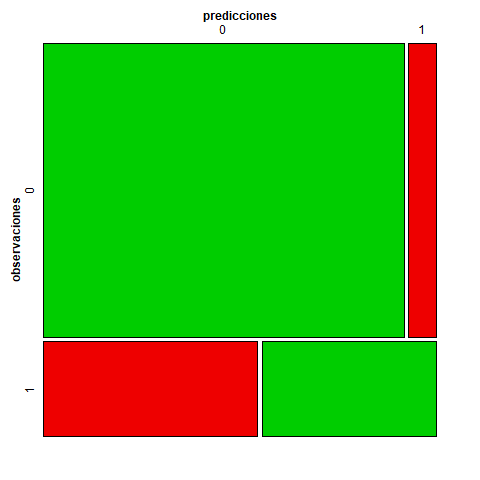

In [21]:
%%R
mosaic(matriz_confusion, shade = T, colorize = T,
       gp = gpar(fill = matrix(c("green3", "red2", "red2", "green3"), 2, 2)))

El modelo es capaz de clasificar correctamente $\frac{140+22}{140+22+27+11}=0.81$ 81% de las observaciones cuando se emplean los datos de entrenamiento. No hay que olvidar que este es el error de entrenamiento, por lo que no es generalizable a nuevas observaciones. Para obtener una estimación más realista hay que calcular el error de test.

## Conclusión


El modelo logístico creado para predecir la probabilidad de que un alumno obtenga matrícula de honor a partir de la nota de matemáticas es en conjunto significativo acorde al Likelihood ratio (p-value = 8.717591e-14). 

El p-value del predictor matematicas es significativo (p-value = 1.03e-09).

$$logit(matricula)=-9.793942 + 0.1563404*\text{nota matematicas}$$

$$P(matricula)=\frac{e^{-9.793942} + 0.1563404 * \text{nota matematicas}}{1+e^{-9.793942} + 0.1563404 * \text{nota matematicas}}$$